In [32]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import model_ou

In [51]:
rng = np.random.default_rng()

In [55]:
np.mean(rng.standard_normal(size=(2,3))**2)

0.9452471549216473

In [33]:
reload(model_ou)

<module 'model_ou' from '/home/jf4241/ecmwf/tpt_ecmwf/examples/ornstein_uhlenbeck/model_ou.py'>

In [72]:
# Create a time-dependent system (OU process) on a (xdim,) system
fpd = {"noise_amp": 0.01, "Lx": 1.0, "Ly": 3.0, "dt_sim": 0.005} 
model = model_ou.OUModel(fpd)

In [73]:
dt_save = 0.01
tmax = 100.0
t_save = np.linspace(0, tmax, int(tmax/dt_save+0.5))
x0 = 0.1*np.ones((1,3))
x = model.integrate(x0, t_save, seed=987)

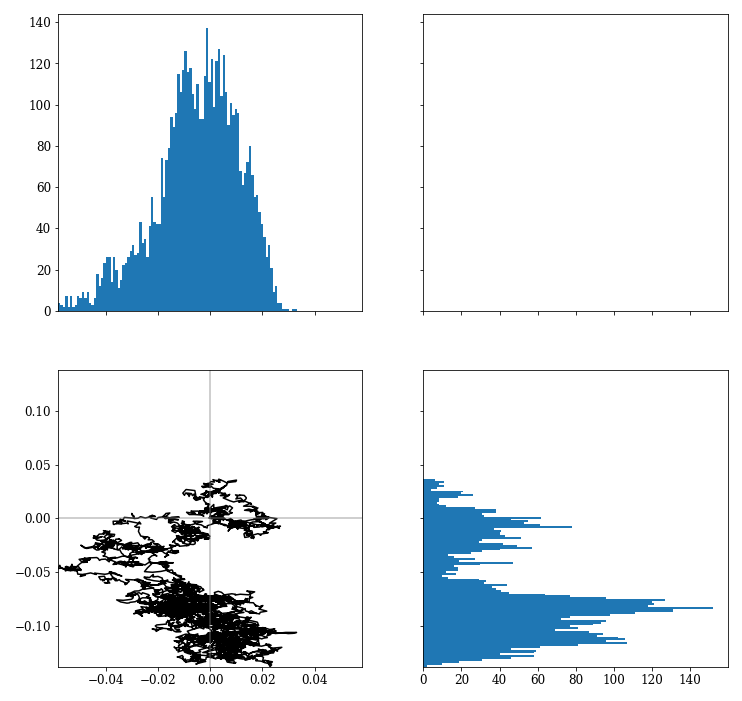

In [74]:
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(12,12),sharex='col',sharey='row')
timin = len(t_save)//2
xlim = np.max(np.abs(x[:,timin:,0]))*np.array([-1,1])
ylim = np.max(np.abs(x[:,timin:,1]))*np.array([-1,1])
axes[1,0].plot(x[0,timin:,0],x[0,timin:,1], color='black')
axes[1,0].axhline(y=0,color='gray',alpha=0.5)
axes[1,0].axvline(x=0,color='gray',alpha=0.5)
axes[1,0].set_xlim(xlim)
axes[1,0].set_ylim(ylim)
_ = axes[0,0].hist(x[0,timin:,0],orientation='vertical',bins=100)
_ = axes[1,1].hist(x[0,timin:,1],orientation='horizontal',bins=100)

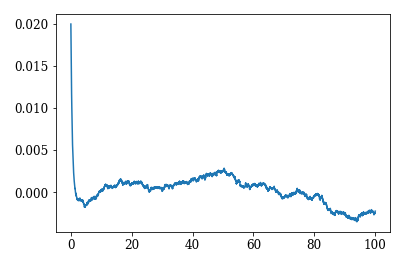

In [12]:
plt.plot(x[0,:,-1],x[0,:,0])

In [ ]:
x0

In [ ]:
model.tendency(x0)

In [ ]:
model.noise_term(x0)

In [ ]:
model.q["L"].dot(x0[0,:2])